In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sample-energy-consumption-1-day/dsn_sample_dataset.xlsx
/kaggle/input/historical-energy-consumption-by-indian-states/long_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/historical-energy-consumption-by-indian-states/long_data.csv')
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [4]:
# Convert dtype of 'Dates' column to datetime
df['Dates'] = pd.to_datetime(df['Dates'], format="%d/%m/%Y %H:%M:%S")

# Add day of the week column
df['DayOfWeek'] = df['Dates'].dt.dayofweek

# Add month column
df['Month'] = df['Dates'].dt.month
df.sample(10)

,States,Regions,latitude,longitude,Dates,Usage,DayOfWeek,Month
6724,Sikkim,ER,27.333330,88.616647,2019-07-24,1.5,2,7
2733,Assam,NER,26.749981,94.216667,2019-03-27,23.0,2,3
9061,Tamil Nadu,SR,12.920386,79.150042,2019-10-05,227.9,5,10
14894,MP,WR,21.300391,76.130019,2020-04-30,223.5,3,4
4058,Tripura,NER,23.835404,91.279999,2019-05-08,4.5,2,5
14884,Haryana,NR,28.450006,77.019991,2020-04-30,183.5,3,4
1153,Nagaland,NER,25.666998,94.116570,2019-02-06,2.0,2,2
6428,Arunachal Pradesh,NER,27.100399,93.616601,2019-07-15,2.1,0,7
1710,Assam,NER,26.749981,94.216667,2019-02-23,28.6,5,2
184,Tamil Nadu,SR,12.920386,79.150042,2019-01-07,294.2,0,1


In [5]:
population_density_dict = {
    "Punjab": 551, "Haryana": 573, "Rajasthan": 201, "Delhi": 11297, "UP": 828,
    "Uttarakhand": 189, "HP": 123, "J&K": 297, "Chandigarh": 350, "Chhattisgarh": 189,
    "Gujarat": 308, "MP": 236, "Maharashtra": 365, "Goa": 394, "DNH": 970,
    "Andhra Pradesh": 303, "Telangana": 312, "Karnataka": 319, "Kerala": 859,
    "Tamil Nadu": 555, "Pondy": 2598, "Bihar": 1106, "Jharkhand": 414, "Odisha": 269,
    "West Bengal": 1028, "Sikkim": 86, "Arunachal Pradesh": 17, "Assam": 398,
    "Manipur": 122, "Meghalaya": 132, "Mizoram": 52, "Nagaland": 119, "Tripura": 350
}

df['PopulationDensity'] = df['States'].map(population_density_dict)

df.head(33)

,States,Regions,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2,1,551
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2,1,573
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2,1,201
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2,1,11297
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2,1,828
5,Uttarakhand,NR,30.320409,78.050006,2019-01-02,40.7,2,1,189
6,HP,NR,31.100025,77.166597,2019-01-02,30.0,2,1,123
7,J&K,NR,33.450000,76.240000,2019-01-02,52.5,2,1,297
8,Chandigarh,NR,30.719997,76.780006,2019-01-02,5.0,2,1,350
9,Chhattisgarh,WR,22.090420,82.159987,2019-01-02,78.7,2,1,189


In [6]:
# df.to_csv('short-energy-consumption-1-day', index=False)

In [10]:
df['Regions'].unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Usage', ylabel='Count'>

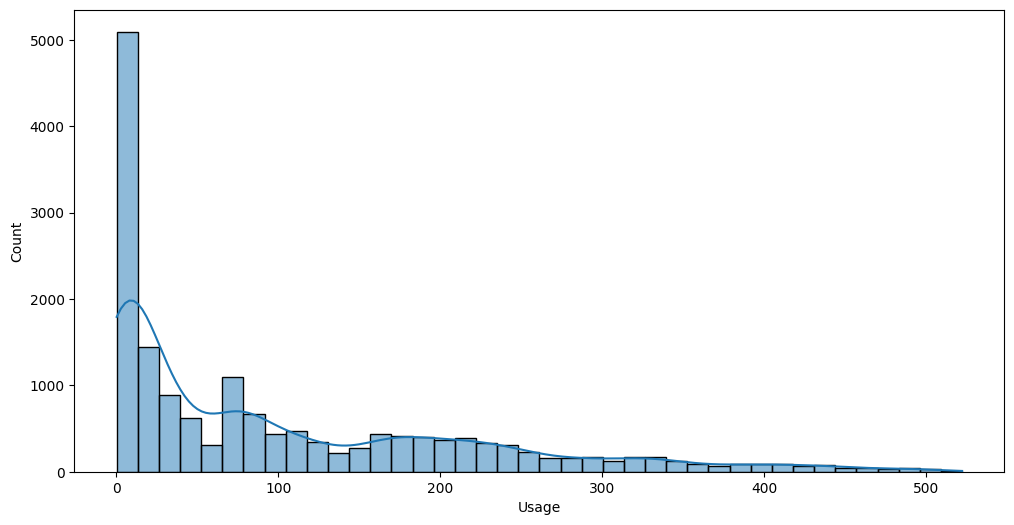

In [11]:
# Check energy usage over time
plt.figure(figsize=(12, 6))
usage_df = df.set_index('Dates')['Usage']

sns.histplot(data=usage_df, kde=True)

## Data Preprocessing

In [12]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,DayOfWeek,Month,PopulationDensity
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2,1,551
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2,1,573
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2,1,201
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2,1,11297
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2,1,828


In [13]:
# Sort by 'States' and 'Dates' for sequential modeling
df = df.sort_values(by=['States', 'Dates']).reset_index(drop=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

# Normalization: Scale numeric columns (Usage and PopulationDensity)
scaler = MinMaxScaler()
df[['Usage', 'PopulationDensity']] = scaler.fit_transform(df[['Usage', 'PopulationDensity']])


# One-hot encode 'States' and 'Regions'
encoder = OneHotEncoder(sparse=False)
categorical_features = encoder.fit_transform(df[['States', 'Regions']])
categorical_features_df = pd.DataFrame(categorical_features, columns=encoder.get_feature_names_out())


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Combine scaled data and encoded features
processed_data = pd.concat([df[['Dates', 'DayOfWeek', 'Month', 'Usage']], categorical_features_df], axis=1)
processed_data.head()

,Dates,DayOfWeek,Month,Usage,States_Andhra Pradesh,States_Arunachal Pradesh,States_Assam,States_Bihar,States_Chandigarh,States_Chhattisgarh,...,States_Telangana,States_Tripura,States_UP,States_Uttarakhand,States_West Bengal,Regions_ER,Regions_NER,Regions_NR,Regions_SR,Regions_WR
0,2019-01-02,2,1,0.314872,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2019-01-03,3,1,0.325412,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2019-01-04,4,1,0.316021,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2019-01-05,5,1,0.320238,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2019-01-06,6,1,0.327520,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Create time series sequences

In [19]:
# Function to create sequences for LSTM
def create_sequences(df, seq_length=6):
    sequences = []
    targets = []
    for i in range(len(df) - seq_length):
        seq = df.iloc[i:i+seq_length].values  # Directly take sequence values
        target = df.iloc[i+seq_length]['Usage']
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


# Generate sequences
state_data = processed_data.drop(columns=['Dates'])
sequences, targets = create_sequences(state_data)

# Display the shape of sequences and targets
sequences.shape, targets.shape

((16593, 6, 41), (16593,))

The sequences and targets have been successfully created:

**Sequences: A 3D array with shape (16593, 6, 41)**
- 16593 time series sequences.
- Each sequence contains 6 time steps.
- Each time step has 41 features (e.g., numerical features and one-hot-encoded categorical features).

**Targets: A 1D array with 16593 values corresponding to the energy usage to be predicted for each sequence.**

## LSTM Model Architecture

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [21]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(64, input_shape=(6, 41), return_sequences=False, activation='relu'),  # LSTM layer
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        27,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Split the sequences and targets into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - mae: 0.0160 - val_loss: 0.0020 - val_mae: 0.0302
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - mae: 0.0164 - val_loss: 0.0016 - val_mae: 0.0279
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0010 - mae: 0.0165 - val_loss: 0.0022 - val_mae: 0.0321
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.7025e-04 - mae: 0.0154 - val_loss: 0.0020 - val_mae: 0.0321
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.8452e-04 - mae: 0.0157 - val_loss: 0.0021 - val_mae: 0.0256
Epoch 6/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - mae: 0.0168 - val_loss: 0.0022 - val_mae: 0.0328
Epoch 7/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.0064e-04 - mae: 0.0149 - val_loss: 0.0021 - val_mae: 0.0313


### Model evaluation

In [24]:
# Evaluate the model's performance on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Mean Absolute Error: {mae:.4f}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mae: 0.0279
Test Loss: 0.0016
Test Mean Absolute Error: 0.0279


In [25]:
# Sample Prediction: Predict for a specific test sample
sample_index = 120  # Change this to test other samples
sample_sequence = X_test[sample_index].reshape(1, 6, 41)  # Reshape to (1, 6, 41)
predicted_usage = model.predict(sample_sequence)
print(f"Actual Usage: {y_test[sample_index]:.4f}")
print(f"Predicted Usage: {predicted_usage[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Actual Usage: 0.5008
Predicted Usage: 0.4581


## Plot Model Training History

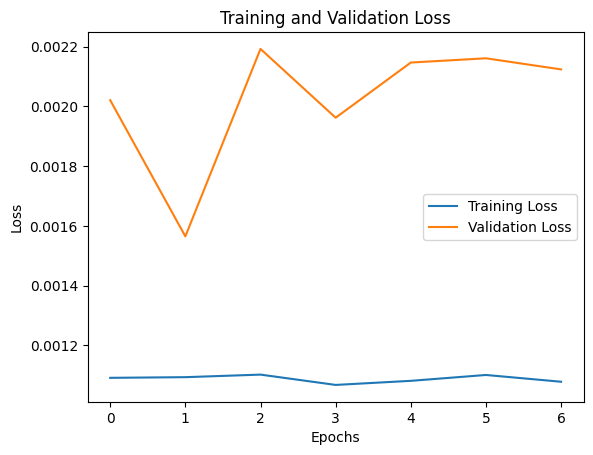

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [51]:
# Save the model
model.save("v2_energy_forecasting_model.h5")

In [52]:
import joblib

# Save the scalers after fitting them during training
joblib.dump(scaler_X, 'scaler_X.pkl')  # Save scaler for input features
joblib.dump(scaler_y, 'scaler_y.pkl')  # Save scaler for target variable (Usage)

['scaler_y.pkl']